In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('INvideos_cc50_202101.csv')

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\1552528432.py:4: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('INvideos_cc50_202101.csv')


In [2]:
# Verificar qué columnas tienen datos faltantes y cuántos hay en cada una
missing_data = df.isnull().sum()
print(missing_data)

video_id                     5
trending_date              916
title                      998
channel_title             1111
category_id               1144
publish_time              1157
tags                      1169
views                     1176
likes                     1181
dislikes                  1181
comment_count             1181
thumbnail_link            1181
comments_disabled         1181
ratings_disabled          1181
video_error_or_removed    1181
description               1742
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64


In [3]:
# Reemplazar valores faltantes en columnas categóricas con la moda
df['title'].fillna(df['title'].mode()[0], inplace=True)
df['channel_title'].fillna(df['channel_title'].mode()[0], inplace=True)
df['description'].fillna(df['description'].mode()[0], inplace=True)


C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\2263850317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna(df['title'].mode()[0], inplace=True)
C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\2263850317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [4]:
# Eliminar filas con datos faltantes en columnas críticas
df.dropna(subset=['trending_date', 'publish_time', 'tags'], inplace=True)


In [5]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('datos_procesados.csv', index=False)

print("Datos procesados guardados en 'datos_procesados.csv'.")


Datos procesados guardados en 'datos_procesados.csv'.


In [6]:
# Importamos todas las librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('datos_procesados.csv')

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\2839408763.py:9: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_procesados.csv')


In [7]:
# Convertir las columnas necesarias a los tipos adecuados
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Convertir columnas numéricas
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count', 'category_id', 'lat', 'lon']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con fechas no válidas
df = df.dropna(subset=['trending_date', 'publish_time'])

# Función para mostrar gráficos
def show_plot(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

**1. ¿Qué categorías de videos son las de mayor tendencia?**

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\2725403741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_categories.index, y=trending_categories.values, palette='viridis')


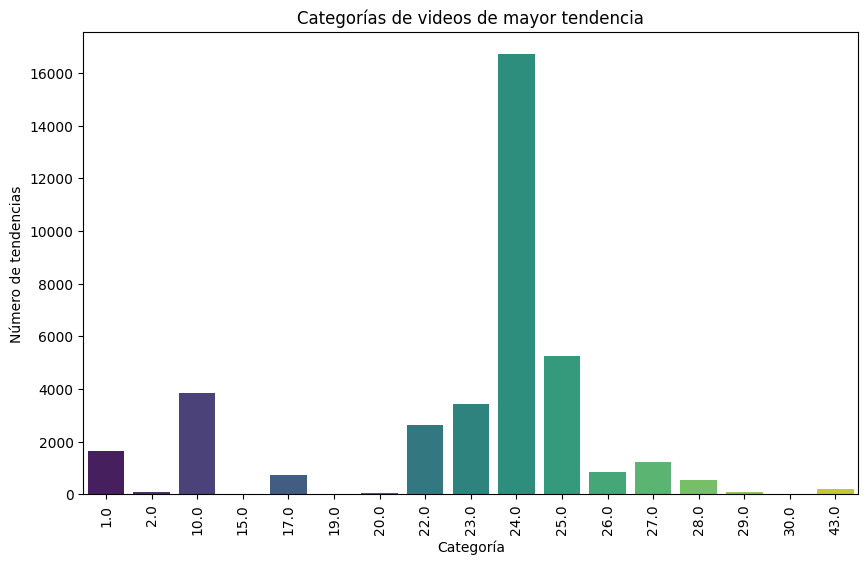

In [8]:
trending_categories = df['category_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=trending_categories.index, y=trending_categories.values, palette='viridis')
show_plot('Categorías de videos de mayor tendencia', 'Categoría', 'Número de tendencias')

**# 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?**

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\1686879789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_per_category.index, y=likes_per_category.values, palette='viridis')


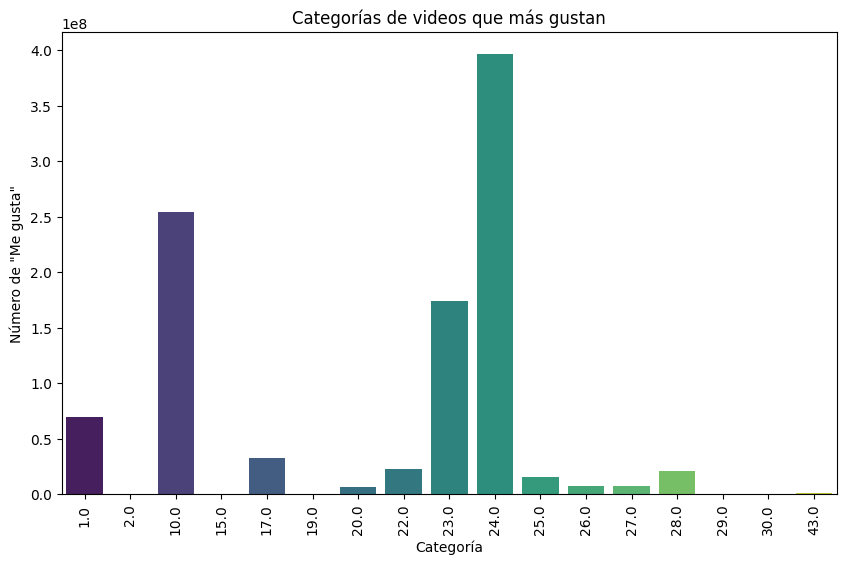

In [9]:
likes_per_category = df.groupby('category_id')['likes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=likes_per_category.index, y=likes_per_category.values, palette='viridis')
show_plot('Categorías de videos que más gustan', 'Categoría', 'Número de "Me gusta"')

**# 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?**

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\3053109848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_likes_dislikes.index, y=ratio_likes_dislikes.values, palette='viridis')


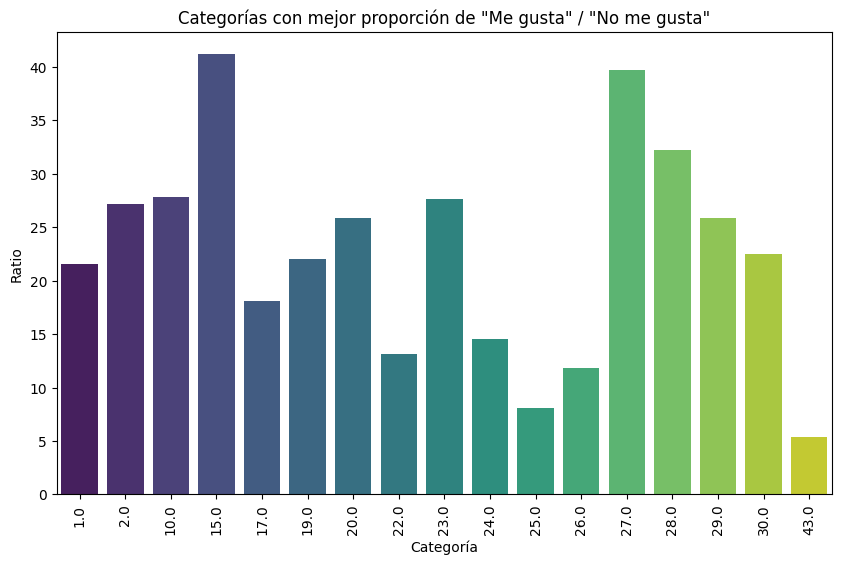

In [10]:
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # Evitar división por cero
ratio_likes_dislikes = df.groupby('category_id')['like_dislike_ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio_likes_dislikes.index, y=ratio_likes_dislikes.values, palette='viridis')
show_plot('Categorías con mejor proporción de "Me gusta" / "No me gusta"', 'Categoría', 'Ratio')

**# 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?**

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\4127761994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_views_comments.index, y=ratio_views_comments.values, palette='viridis')


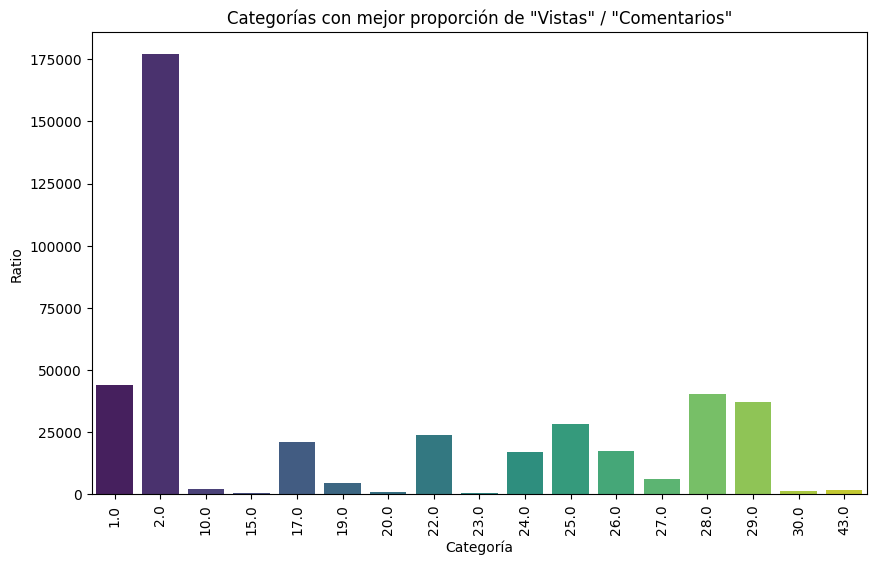

In [11]:
df['views_comments_ratio'] = df['views'] / (df['comment_count'] + 1)  # Evitar división por cero
ratio_views_comments = df.groupby('category_id')['views_comments_ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio_views_comments.index, y=ratio_views_comments.values, palette='viridis')
show_plot('Categorías con mejor proporción de "Vistas" / "Comentarios"', 'Categoría', 'Ratio')


**# 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?**

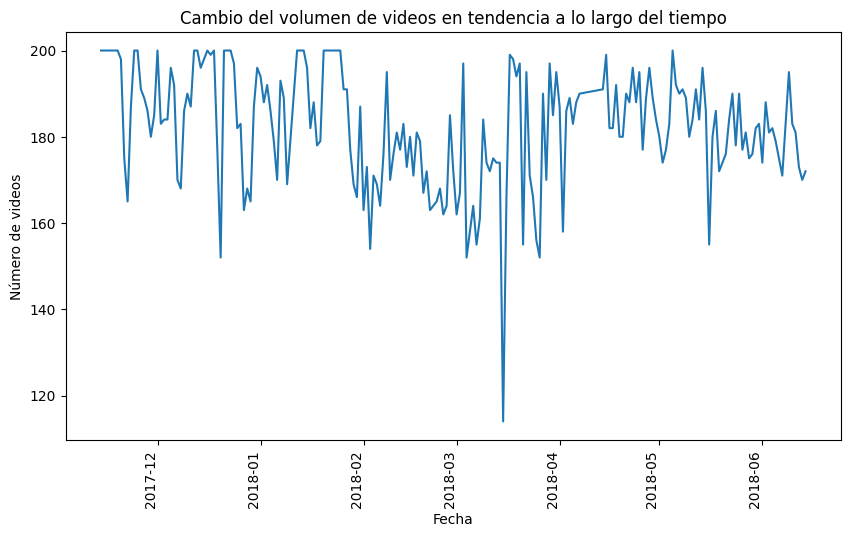

In [12]:
volume_over_time = df['trending_date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
volume_over_time.plot()
show_plot('Cambio del volumen de videos en tendencia a lo largo del tiempo', 'Fecha', 'Número de videos')


**# 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?**

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\821703593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_channels.index, y=trending_channels.values, palette='viridis')


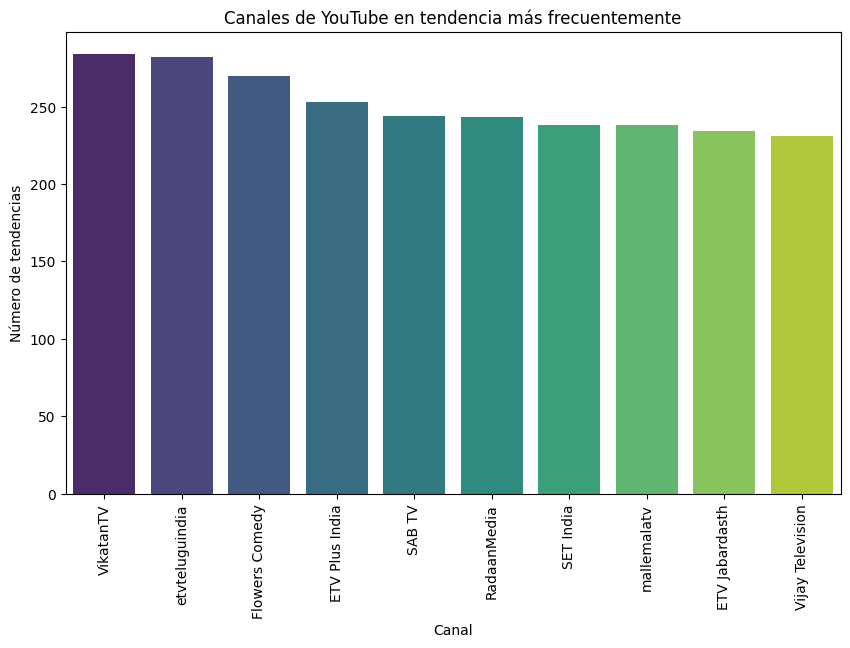

In [13]:
trending_channels = df['channel_title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=trending_channels.index, y=trending_channels.values, palette='viridis')
show_plot('Canales de YouTube en tendencia más frecuentemente', 'Canal', 'Número de tendencias')


**# 7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?**

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\2681308396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=views_per_state.index, y=views_per_state.values, palette='viridis')


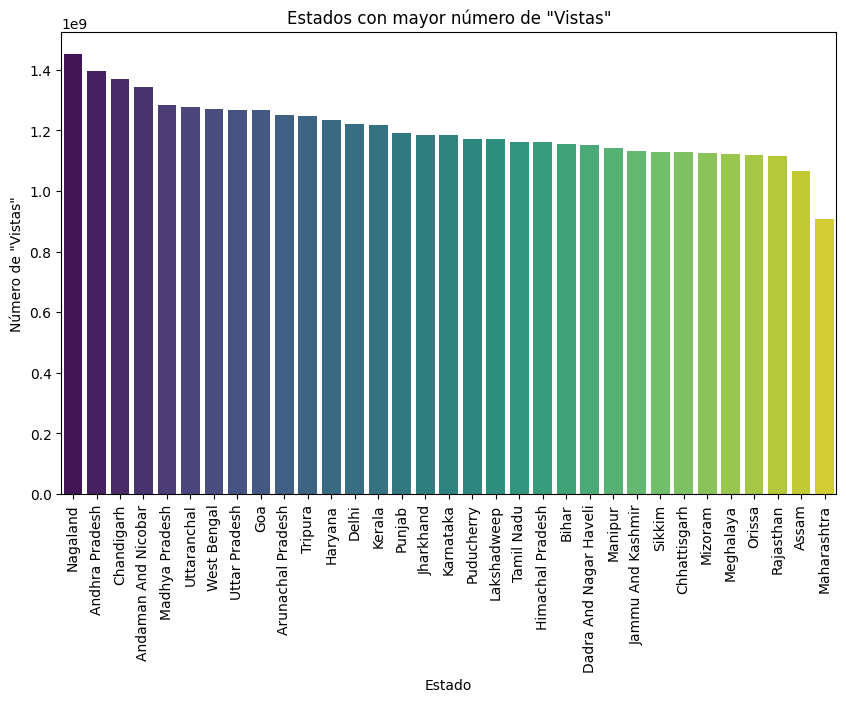

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\2681308396.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_per_state.index, y=likes_per_state.values, palette='viridis')


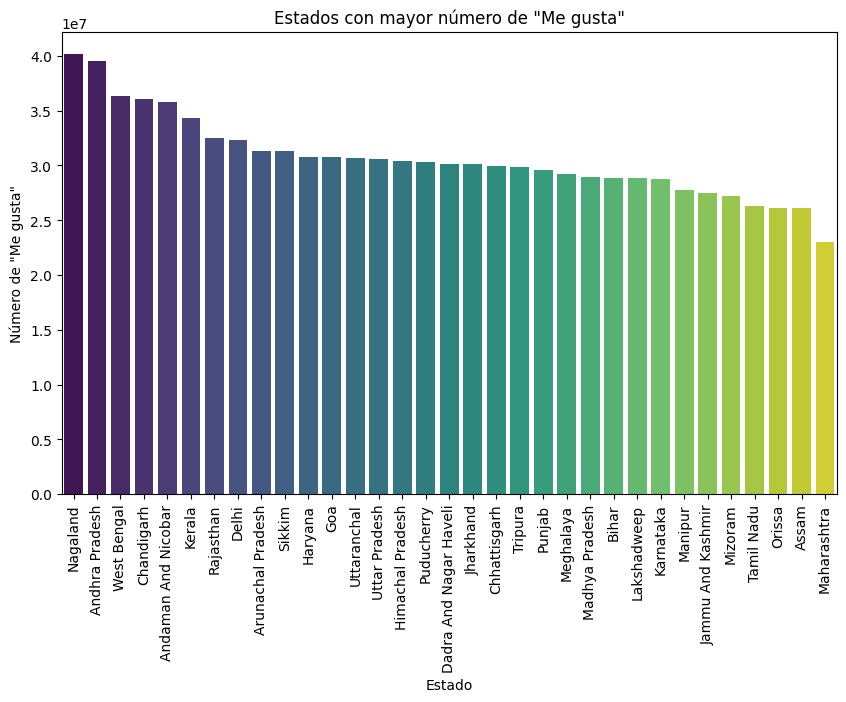

C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\2681308396.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dislikes_per_state.index, y=dislikes_per_state.values, palette='viridis')


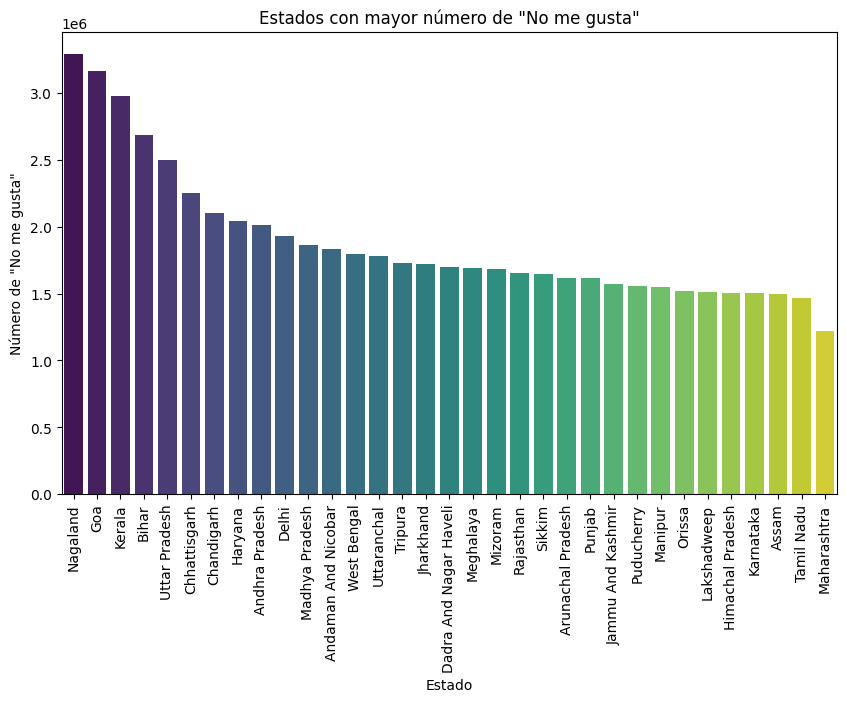

In [14]:
views_per_state = df.groupby('state')['views'].sum().sort_values(ascending=False)
likes_per_state = df.groupby('state')['likes'].sum().sort_values(ascending=False)
dislikes_per_state = df.groupby('state')['dislikes'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=views_per_state.index, y=views_per_state.values, palette='viridis')
show_plot('Estados con mayor número de "Vistas"', 'Estado', 'Número de "Vistas"')

plt.figure(figsize=(10, 6))
sns.barplot(x=likes_per_state.index, y=likes_per_state.values, palette='viridis')
show_plot('Estados con mayor número de "Me gusta"', 'Estado', 'Número de "Me gusta"')

plt.figure(figsize=(10, 6))
sns.barplot(x=dislikes_per_state.index, y=dislikes_per_state.values, palette='viridis')
show_plot('Estados con mayor número de "No me gusta"', 'Estado', 'Número de "No me gusta"')


**# 8. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?**

Vistas en funcion de likes y dislikes

In [39]:
X = df[['likes', 'dislikes']]
y = df['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"MSE:  {mean_squared_error(y_test, y_pred):e}")
print("R^2 Score:", round(r2_score(y_test, y_pred), 5))

MSE:  2.990379e+11
R^2 Score: 0.7371


<Axes: xlabel='views'>

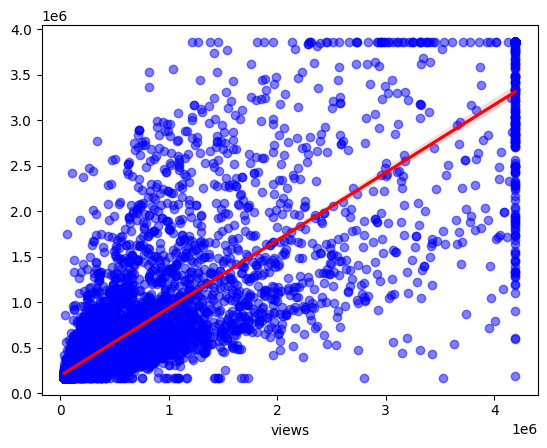

In [40]:
# graficar la regresión
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})

likes en funcion de comentarios y vistas

In [41]:
X = df[['views','comment_count']]
y = df['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE:  {mean_squared_error(y_test, y_pred):e}")
print("R^2 Score:", round(r2_score(y_test, y_pred), 5))

MSE:  1.237996e+08
R^2 Score: 0.88015


<Axes: xlabel='likes'>

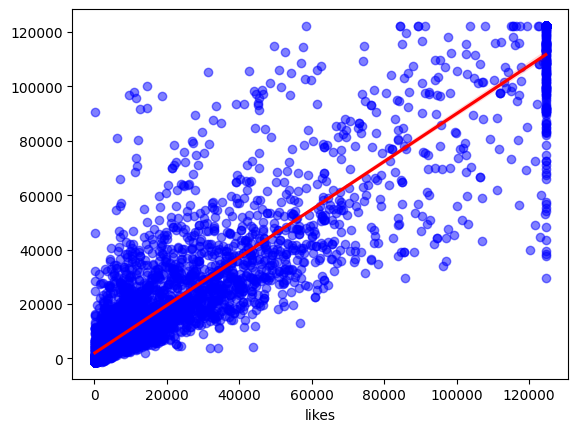

In [42]:
# graficar la regresión
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})

Dislikes en funcion de categoria y vistas

In [43]:
X = df[['category_id','views']]
y = df['dislikes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE:  {mean_squared_error(y_test, y_pred):e}")
print("R^2 Score:", round(r2_score(y_test, y_pred), 5))

MSE:  6.090177e+05
R^2 Score: 0.69684


<Axes: xlabel='dislikes'>

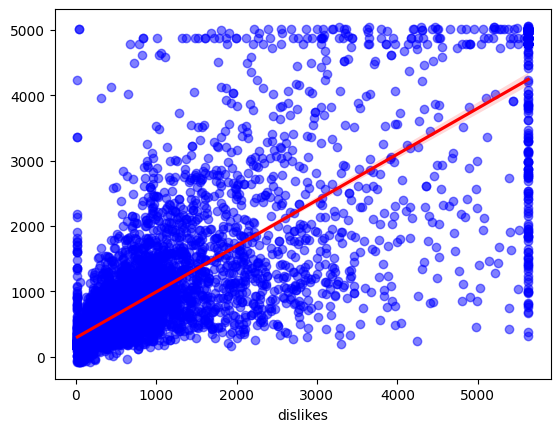

In [44]:
# graficar la regresión
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})

# Limpieza de outliders
Creo que el windsorize queda, tienen mejor varianza que el IQR

Limpieza de outliders (univariados)

In [18]:
# Resetear al dataframe original
def csv_preproced():
    df = pd.read_csv('datos_procesados.csv')
    # Convertir las columnas necesarias a los tipos adecuados
    df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

    # Convertir columnas numéricas
    numerical_cols = ['views', 'likes', 'dislikes', 'comment_count', 'category_id', 'lat', 'lon']
    for col in numerical_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Eliminar filas con fechas no válidas
    df = df.dropna(subset=['trending_date', 'publish_time'])
    return df
df = csv_preproced()


C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\1880646451.py:3: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_procesados.csv')


In [38]:
# metodo Winsorize
from scipy.stats.mstats import winsorize

df = csv_preproced()

df['likes'] = winsorize(df['likes'], limits=[0.05, 0.05])
df['dislikes'] = winsorize(df['dislikes'], limits=[0.05, 0.05])
df['views'] = winsorize(df['views'], limits=[0.05, 0.05])
df['comment_count'] = winsorize(df['comment_count'], limits=[0.05, 0.05])




C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\1880646451.py:3: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_procesados.csv')


In [31]:
# con el método de IQR
# limpiar los datos atípicos de likes

df = csv_preproced()

Q1 = df['likes'].quantile(0.25)
Q3 = df['likes'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
df = df[(df['likes'] < (Q3 + 1.5 * IQR)) & (df['likes'] > (Q1 - 1.5 * IQR))]

# limpiar los datos atípicos de dislikes
Q1 = df['dislikes'].quantile(0.25)
Q3 = df['dislikes'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['dislikes'] < (Q3 + 1.5 * IQR)) & (df['dislikes'] > (Q1 - 1.5 * IQR))]
# limpiar los datos atípicos de views
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['views'] < (Q3 + 1.5 * IQR)) & (df['views'] > (Q1 - 1.5 * IQR))]
# Limpiar los datos atípicos de comment_count
Q1 = df['comment_count'].quantile(0.25)
Q3 = df['comment_count'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['comment_count'] < (Q3 + 1.5 * IQR)) & (df['comment_count'] > (Q1 - 1.5 * IQR))]

        

864.0 13774.25 12910.25


C:\Users\rodyv\AppData\Local\Temp\ipykernel_28212\1880646451.py:3: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_procesados.csv')


**# 9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?**

Videos en tendencia con mayor cantidad de comentarios positivos:
 video_id
#NAME?         348
oRyaPq1-vro      9
v6Z4QQIqCU0      9
x8Z07R8axag      9
V4uyeKG_cJI      9
C6EiYnpcOPg      8
d6sRN0ZWqTA      8
TOuz_GxO-H4      8
AcS1vzVeNrg      8
ugxFEHjXKvk      8
Name: count, dtype: int64


C:\Users\rodyv\AppData\Local\Temp\ipykernel_19252\789616601.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_positive_comments.index, y=trending_positive_comments.values, palette='viridis')


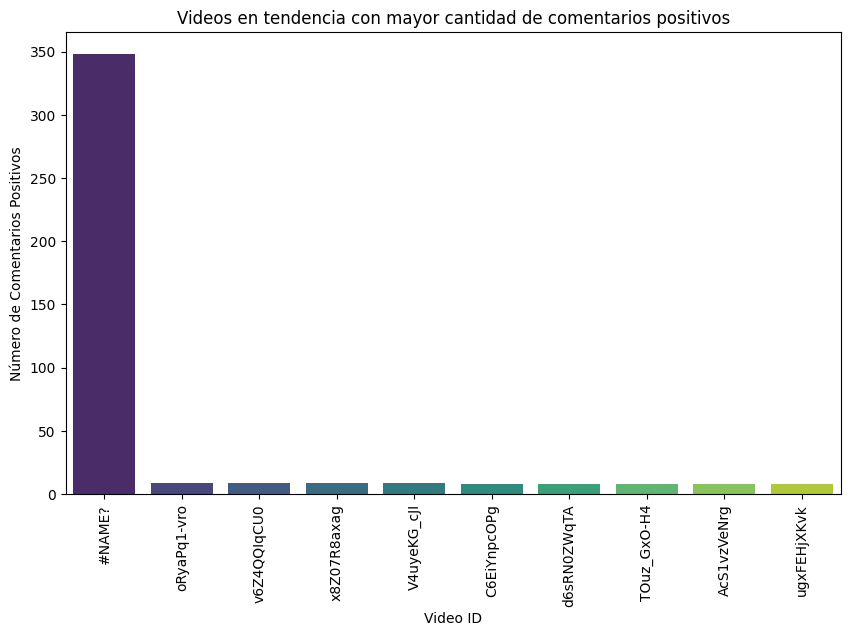

In [170]:
# Convertir 'comments_disabled' a booleano
df['comments_disabled'] = df['comments_disabled'].astype(bool)

# Convertir 'comment_count' a numérico
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce').fillna(0).astype(int)

# Calcular comentarios positivos
df['positive_comments'] = df['comment_count'] - df['comments_disabled'].astype(int)

# Filtrar videos con comentarios positivos
positive_comments = df[df['positive_comments'] > 0]

# Mostrar los videos en tendencia con mayor cantidad de comentarios positivos
trending_positive_comments = positive_comments['video_id'].value_counts().head(10)
print("Videos en tendencia con mayor cantidad de comentarios positivos:\n", trending_positive_comments)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=trending_positive_comments.index, y=trending_positive_comments.values, palette='viridis')
plt.title('Videos en tendencia con mayor cantidad de comentarios positivos')
plt.xlabel('Video ID')
plt.ylabel('Número de Comentarios Positivos')
plt.xticks(rotation=90)
plt.show()